In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from utils.visualization_utils import perc, SetPlotRC, ApplyFont

import warnings
warnings.filterwarnings("ignore")

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

In [3]:
df_kernel_alternative_proxy = pd.read_pickle(r"../Results/Kernel_Alternative_Proxy_dSpriteV3.pkl")
df_kernel_negative_control = pd.read_pickle(r"../Results/Kernel_Negative_Control_dSpriteV2.pkl")
df_KPV = pd.read_pickle(r"../Results/KPV_dSpriteV2.pkl")
df_PMMR = pd.read_pickle(r"../Results/PMMR_dSpriteV2.pkl")

df_kernel_alternative_proxy = df_kernel_alternative_proxy.loc[(df_kernel_alternative_proxy["scale_data"] == True) & (df_kernel_alternative_proxy["length_scale_heuristic_quantile"] == 0.95)]
df_kernel_negative_control = df_kernel_negative_control.loc[(df_kernel_negative_control["scale_data"] == True) & (df_kernel_negative_control["length_scale_quantile"] == 0.5)]
df_PMMR = df_PMMR.loc[df_PMMR["scale_data"] == True]
df_KPV = df_KPV.loc[df_KPV["scale_data"] == True]

In [4]:
df_kernel_alternative_proxy.shape, df_kernel_negative_control.shape, df_KPV.shape, df_PMMR.shape

((360, 12), (90, 10), (90, 7), (810, 9))

# With Data Scaling

In [5]:
df_kernel_alternative_proxy_results_wrt_eta = pd.DataFrame(columns = ['Algorithm', 'eta_parameter', 'sigma_square', 'Data_Size', 'stage1_perc', 'Causal_MSE_mean', 'Causal_MSE_std'])

for n_plus_m in df_kernel_alternative_proxy["Data_Size"].unique():
    for eta_parameter in df_kernel_alternative_proxy["eta_parameter"].unique():
        for stage1_perc_ in df_kernel_alternative_proxy["stage1_perc"].unique():
            for sigma_sq in df_kernel_alternative_proxy["sigma_square"].unique():
                df_eta = df_kernel_alternative_proxy.loc[(df_kernel_alternative_proxy['eta_parameter'] == eta_parameter) & (df_kernel_alternative_proxy['Data_Size'] == n_plus_m) & (df_kernel_alternative_proxy['stage1_perc'] == stage1_perc_) & (df_kernel_alternative_proxy['sigma_square'] == sigma_sq)]
        
                df_eta_dict = {
                    "Algorithm" : "Kernel_Alternative_Proxy",
                    "eta_parameter" : eta_parameter,
                    "sigma_square" : sigma_sq, 
                    "Data_Size" : n_plus_m,
                    "stage1_perc" : stage1_perc_,
                    "Causal_MSE_mean" : df_eta["Causal_MSE"].mean(),
                    "Causal_MSE_std" : df_eta["Causal_MSE"].std(),
                }
            
                df_kernel_alternative_proxy_results_wrt_eta = pd.concat([df_kernel_alternative_proxy_results_wrt_eta, pd.DataFrame([df_eta_dict])], ignore_index = True)

df_kernel_alternative_proxy = df_kernel_alternative_proxy.loc[(df_kernel_alternative_proxy["stage1_perc"] == 0.5) & (df_kernel_alternative_proxy["eta_parameter"] == "learned") & (df_kernel_alternative_proxy['sigma_square'] == 3.)]
# df_kernel_alternative_proxy_results_wrt_eta = df_kernel_alternative_proxy_results_wrt_eta.loc[~df_kernel_alternative_proxy_results_wrt_eta["Causal_MSE_mean"].isnull()]
df_kernel_alternative_proxy_results_wrt_eta

,Algorithm,eta_parameter,sigma_square,Data_Size,stage1_perc,Causal_MSE_mean,Causal_MSE_std
0,Kernel_Alternative_Proxy,learned,0.0,500,0.5,32.965601,3.167884
1,Kernel_Alternative_Proxy,learned,1.0,500,0.5,31.504704,3.301796
2,Kernel_Alternative_Proxy,learned,2.0,500,0.5,31.243562,3.367886
3,Kernel_Alternative_Proxy,learned,3.0,500,0.5,31.163185,3.364861
4,Kernel_Alternative_Proxy,learned,0.0,1000,0.5,31.193869,1.945450
5,Kernel_Alternative_Proxy,learned,1.0,1000,0.5,29.040611,1.487165
6,Kernel_Alternative_Proxy,learned,2.0,1000,0.5,28.489176,1.471125
7,Kernel_Alternative_Proxy,learned,3.0,1000,0.5,28.082371,1.467634
8,Kernel_Alternative_Proxy,learned,0.0,2000,0.5,32.761497,1.335344
9,Kernel_Alternative_Proxy,learned,1.0,2000,0.5,29.488843,1.018180


In [6]:
df_kernel_negative_control_results_wrt_stage1_perc = pd.DataFrame(columns = ["Algorithm", "Data_Size", "stage1_perc", "Causal_MSE_mean", "Causal_MSE_std"])

for n_plus_m in df_kernel_negative_control["Data_Size"].unique():
    for stage1_perc in df_kernel_negative_control["stage1_perc"].unique():
            df_stage1_perc = df_kernel_negative_control.loc[(df_kernel_negative_control["stage1_perc"] == stage1_perc) & (df_kernel_negative_control["Data_Size"] == n_plus_m)]
            df_stage1_perc_dict = { "Algorithm" : "Kernel_Negative_Control",
                                   "Data_Size" : n_plus_m,
                                   "stage1_perc" : stage1_perc,
                                   "Causal_MSE_mean" : df_stage1_perc["Causal_MSE"].mean(),
                                   "Causal_MSE_std" : df_stage1_perc["Causal_MSE"].std()}
            df_kernel_negative_control_results_wrt_stage1_perc = pd.concat([df_kernel_negative_control_results_wrt_stage1_perc, pd.DataFrame([df_stage1_perc_dict])], ignore_index = True)
df_kernel_negative_control = df_kernel_negative_control.loc[(df_kernel_negative_control["stage1_perc"] == 0.5)]
df_kernel_negative_control_results_wrt_stage1_perc

,Algorithm,Data_Size,stage1_perc,Causal_MSE_mean,Causal_MSE_std
0,Kernel_Negative_Control,500,0.5,31.582168,3.954510
1,Kernel_Negative_Control,1000,0.5,29.821791,5.020718
2,Kernel_Negative_Control,2000,0.5,33.811793,6.967256


In [7]:
df_KPV_results_wrt_scale_data = pd.DataFrame(columns = ["Algorithm", "scale_data", "Data_Size", "Causal_MSE_mean", "Causal_MSE_std"])

for data_size in df_KPV["Data_Size"].unique():
    for scale_data in df_KPV["scale_data"].unique():
        df_scale_data = df_KPV.loc[(df_KPV["scale_data"] == scale_data) & (df_KPV["Data_Size"] == data_size)]
        df_scale_data_dict = { "Algorithm" : "KPV",
                               "scale_data" : scale_data,
                               "Data_Size" : data_size, 
                               "Causal_MSE_mean" : df_scale_data["Causal_MSE"].mean(),
                               "Causal_MSE_std" : df_scale_data["Causal_MSE"].std()}
        df_KPV_results_wrt_scale_data = pd.concat([df_KPV_results_wrt_scale_data, pd.DataFrame([df_scale_data_dict])], ignore_index = True)

df_KPV_results_wrt_scale_data

,Algorithm,scale_data,Data_Size,Causal_MSE_mean,Causal_MSE_std
0,KPV,True,500,31.979910,5.389549
1,KPV,True,1000,27.990979,4.675362
2,KPV,True,2000,26.601520,3.261907


In [8]:
df_PMMR_results_wrt_lam = pd.DataFrame(columns = ["Algorithm", "lam1", "lam2", "Data_Size", "Causal_MSE_mean", "Causal_MSE_std"])

for lam1_ in df_PMMR["lam1"].unique():
    for lam2_ in df_PMMR["lam2"].unique():
        for data_size in df_PMMR["Data_Size"].unique():
            df_lam = df_PMMR.loc[(df_PMMR["lam1"] == lam1_) & (df_PMMR["lam2"] == lam2_) & (df_PMMR["Data_Size"] == data_size)]
            df_lam_dict = {
                "Algorithm": "PMMR",
                "lam1": lam1_,
                "lam2": lam2_,
                "Data_Size" : data_size,
                "Causal_MSE_mean" : df_lam["Causal_MSE"].mean(),
                "Causal_MSE_std" : df_lam["Causal_MSE"].std(),
            }
    
            df_PMMR_results_wrt_lam = pd.concat([df_PMMR_results_wrt_lam, pd.DataFrame([df_lam_dict])], ignore_index = True)

df_PMMR = df_PMMR.loc[(df_PMMR["lam1"] == 1e-2) & (df_PMMR["lam2"] == 1e-2)]

df_PMMR_results_wrt_lam

,Algorithm,lam1,lam2,Data_Size,Causal_MSE_mean,Causal_MSE_std
0,PMMR,0.0001,0.0001,500,28.722331,3.192475
1,PMMR,0.0001,0.0001,1000,22.281741,1.133943
2,PMMR,0.0001,0.0001,2000,20.943452,0.567701
3,PMMR,0.0001,0.0010,500,28.722331,3.192475
4,PMMR,0.0001,0.0010,1000,22.281741,1.133943
5,PMMR,0.0001,0.0010,2000,20.943452,0.567701
6,PMMR,0.0001,0.0100,500,28.722331,3.192475
7,PMMR,0.0001,0.0100,1000,22.281741,1.133943
8,PMMR,0.0001,0.0100,2000,20.943452,0.567701
9,PMMR,0.0010,0.0001,500,30.046339,3.402425


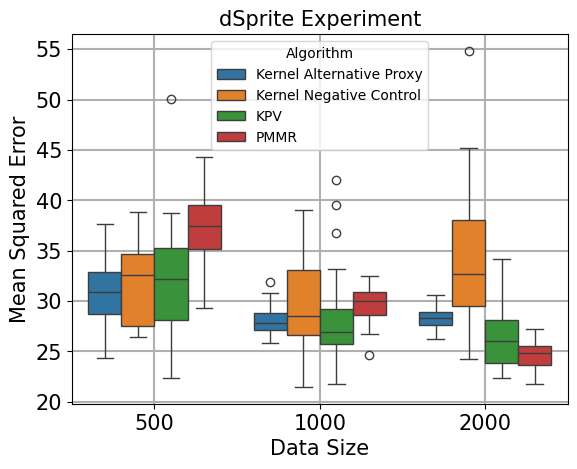

In [9]:
df_kernel_alternative_proxy['Algorithm'] = 'Kernel Alternative Proxy'
df_kernel_negative_control['Algorithm'] = 'Kernel Negative Control'
df_dSprite_results = pd.concat([
                                df_kernel_alternative_proxy,
                                df_kernel_negative_control, 
                                df_KPV,
                                df_PMMR
                      ],
                      axis = 0)

sns.boxplot(data=df_dSprite_results[["Algorithm", "Data_Size", "Causal_MSE"]], x='Data_Size', y='Causal_MSE', hue='Algorithm')
plt.xlabel("Data Size", fontsize=10)
plt.ylabel("Mean Squared Error", fontsize=10)
plt.title("dSprite Experiment", fontsize=10)
plt.grid(linewidth=1.5)
ApplyFont(plt.gca(), xlabel_text_size = 15.0, ylabel_text_size = 15.0, title_text_size = 15.0, ticks_text_size = 15,)
plt.savefig('Figures/Alternative_Proxy_ATE_ComplexityRegularized_dSprite_ComparisonV2_Normalized.pdf', format='pdf', bbox_inches = 'tight')
plt.show()

In [10]:
df_kernel_alternative_proxy.shape, df_kernel_negative_control.shape, df_KPV.shape, df_PMMR.shape

((90, 12), (90, 10), (90, 7), (90, 9))

# Without Data Scaling

In [11]:
df_kernel_alternative_proxy = pd.read_pickle(r"../Results/Kernel_Alternative_Proxy_dSpriteV3.pkl")
df_kernel_negative_control = pd.read_pickle(r"../Results/Kernel_Negative_Control_dSpriteV2.pkl")
df_KPV = pd.read_pickle(r"../Results/KPV_dSpriteV2.pkl")
df_PMMR = pd.read_pickle(r"../Results/PMMR_dSpriteV2.pkl")

df_kernel_alternative_proxy = df_kernel_alternative_proxy.loc[(df_kernel_alternative_proxy["scale_data"] == False) & (df_kernel_alternative_proxy["length_scale_heuristic_quantile"] == 0.95)]
df_kernel_negative_control = df_kernel_negative_control.loc[(df_kernel_negative_control["scale_data"] == False) & (df_kernel_negative_control["length_scale_quantile"] == 0.5)]
df_KPV = df_KPV.loc[df_KPV["scale_data"] == False]
df_PMMR = df_PMMR.loc[df_PMMR["scale_data"] == False]

In [12]:
df_kernel_alternative_proxy.shape, df_kernel_negative_control.shape, df_KPV.shape, df_PMMR.shape

((360, 12), (90, 10), (90, 7), (810, 9))

In [13]:
df_kernel_alternative_proxy_results_wrt_eta = pd.DataFrame(columns = ['Algorithm', 'eta_parameter', 'sigma_square', 'Data_Size', 'stage1_perc', 'Causal_MSE_mean', 'Causal_MSE_std'])

for n_plus_m in df_kernel_alternative_proxy["Data_Size"].unique():
    for eta_parameter in df_kernel_alternative_proxy["eta_parameter"].unique():
        for stage1_perc_ in df_kernel_alternative_proxy["stage1_perc"].unique():
            for sigma_sq in df_kernel_alternative_proxy["sigma_square"].unique():
                df_eta = df_kernel_alternative_proxy.loc[(df_kernel_alternative_proxy['eta_parameter'] == eta_parameter) & (df_kernel_alternative_proxy['Data_Size'] == n_plus_m) & (df_kernel_alternative_proxy['stage1_perc'] == stage1_perc_) & (df_kernel_alternative_proxy['sigma_square'] == sigma_sq)]
        
                df_eta_dict = {
                    "Algorithm" : "Kernel_Alternative_Proxy",
                    "eta_parameter" : eta_parameter,
                    "sigma_square" : sigma_sq, 
                    "Data_Size" : n_plus_m,
                    "stage1_perc" : stage1_perc_,
                    "Causal_MSE_mean" : df_eta["Causal_MSE"].mean(),
                    "Causal_MSE_std" : df_eta["Causal_MSE"].std(),
                }
            
                df_kernel_alternative_proxy_results_wrt_eta = pd.concat([df_kernel_alternative_proxy_results_wrt_eta, pd.DataFrame([df_eta_dict])], ignore_index = True)

df_kernel_alternative_proxy = df_kernel_alternative_proxy.loc[(df_kernel_alternative_proxy["stage1_perc"] == 0.5) & (df_kernel_alternative_proxy["eta_parameter"] == "learned") & (df_kernel_alternative_proxy['sigma_square'] == 1.)]
# df_kernel_alternative_proxy_results_wrt_eta = df_kernel_alternative_proxy_results_wrt_eta.loc[~df_kernel_alternative_proxy_results_wrt_eta["Causal_MSE_mean"].isnull()]
df_kernel_alternative_proxy_results_wrt_eta

,Algorithm,eta_parameter,sigma_square,Data_Size,stage1_perc,Causal_MSE_mean,Causal_MSE_std
0,Kernel_Alternative_Proxy,learned,0.0,500,0.5,47.128995,21.583457
1,Kernel_Alternative_Proxy,learned,1.0,500,0.5,25.075260,2.078719
2,Kernel_Alternative_Proxy,learned,2.0,500,0.5,24.633619,2.087844
3,Kernel_Alternative_Proxy,learned,3.0,500,0.5,24.450019,2.105765
4,Kernel_Alternative_Proxy,learned,0.0,1000,0.5,59.247397,29.967178
5,Kernel_Alternative_Proxy,learned,1.0,1000,0.5,23.820217,1.247290
6,Kernel_Alternative_Proxy,learned,2.0,1000,0.5,23.128423,1.120485
7,Kernel_Alternative_Proxy,learned,3.0,1000,0.5,22.817634,1.059562
8,Kernel_Alternative_Proxy,learned,0.0,2000,0.5,103.330961,106.969474
9,Kernel_Alternative_Proxy,learned,1.0,2000,0.5,25.324205,0.876350


In [14]:
df_kernel_negative_control_results_wrt_stage1_perc = pd.DataFrame(columns = ["Algorithm", "Data_Size", "stage1_perc", "Causal_MSE_mean", "Causal_MSE_std"])

for n_plus_m in df_kernel_negative_control["Data_Size"].unique():
    for stage1_perc in df_kernel_negative_control["stage1_perc"].unique():
            df_stage1_perc = df_kernel_negative_control.loc[(df_kernel_negative_control["stage1_perc"] == stage1_perc) & (df_kernel_negative_control["Data_Size"] == n_plus_m)]
            df_stage1_perc_dict = { "Algorithm" : "Kernel_Negative_Control",
                                   "Data_Size" : n_plus_m,
                                   "stage1_perc" : stage1_perc,
                                   "Causal_MSE_mean" : df_stage1_perc["Causal_MSE"].mean(),
                                   "Causal_MSE_std" : df_stage1_perc["Causal_MSE"].std()}
            df_kernel_negative_control_results_wrt_stage1_perc = pd.concat([df_kernel_negative_control_results_wrt_stage1_perc, pd.DataFrame([df_stage1_perc_dict])], ignore_index = True)
df_kernel_negative_control = df_kernel_negative_control.loc[(df_kernel_negative_control["stage1_perc"] == 0.5)]
df_kernel_negative_control_results_wrt_stage1_perc

,Algorithm,Data_Size,stage1_perc,Causal_MSE_mean,Causal_MSE_std
0,Kernel_Negative_Control,500,0.5,40.404988,2.858805
1,Kernel_Negative_Control,1000,0.5,36.328257,1.976423
2,Kernel_Negative_Control,2000,0.5,34.070521,1.585199


In [15]:
df_KPV_results_wrt_scale_data = pd.DataFrame(columns = ["Algorithm", "scale_data", "Data_Size", "Causal_MSE_mean", "Causal_MSE_std"])

for data_size in df_KPV["Data_Size"].unique():
    for scale_data in df_KPV["scale_data"].unique():
        df_scale_data = df_KPV.loc[(df_KPV["scale_data"] == scale_data) & (df_KPV["Data_Size"] == data_size)]
        df_scale_data_dict = { "Algorithm" : "KPV",
                               "scale_data" : scale_data,
                               "Data_Size" : data_size, 
                               "Causal_MSE_mean" : df_scale_data["Causal_MSE"].mean(),
                               "Causal_MSE_std" : df_scale_data["Causal_MSE"].std()}
        df_KPV_results_wrt_scale_data = pd.concat([df_KPV_results_wrt_scale_data, pd.DataFrame([df_scale_data_dict])], ignore_index = True)

df_KPV_results_wrt_scale_data

,Algorithm,scale_data,Data_Size,Causal_MSE_mean,Causal_MSE_std
0,KPV,False,500,41.856668,3.544128
1,KPV,False,1000,38.027886,2.296071
2,KPV,False,2000,33.190327,1.653423


In [16]:
df_PMMR_results_wrt_lam = pd.DataFrame(columns = ["Algorithm", "lam1", "lam2", "Data_Size", "Causal_MSE_mean", "Causal_MSE_std"])

for lam1_ in df_PMMR["lam1"].unique():
    for lam2_ in df_PMMR["lam2"].unique():
        for data_size in df_PMMR["Data_Size"].unique():
            df_lam = df_PMMR.loc[(df_PMMR["lam1"] == lam1_) & (df_PMMR["lam2"] == lam2_) & (df_PMMR["Data_Size"] == data_size)]
            df_lam_dict = {
                "Algorithm": "PMMR",
                "lam1": lam1_,
                "lam2": lam2_,
                "Data_Size" : data_size,
                "Causal_MSE_mean" : df_lam["Causal_MSE"].mean(),
                "Causal_MSE_std" : df_lam["Causal_MSE"].std(),
            }
    
            df_PMMR_results_wrt_lam = pd.concat([df_PMMR_results_wrt_lam, pd.DataFrame([df_lam_dict])], ignore_index = True)

df_PMMR = df_PMMR.loc[(df_PMMR["lam1"] == 1e-2) & (df_PMMR["lam2"] == 1e-2)]

df_PMMR_results_wrt_lam

,Algorithm,lam1,lam2,Data_Size,Causal_MSE_mean,Causal_MSE_std
0,PMMR,0.0001,0.0001,500,35.170004,2.835339
1,PMMR,0.0001,0.0001,1000,29.806642,1.407732
2,PMMR,0.0001,0.0001,2000,26.589911,1.049986
3,PMMR,0.0001,0.0010,500,35.170004,2.835339
4,PMMR,0.0001,0.0010,1000,29.806642,1.407732
5,PMMR,0.0001,0.0010,2000,26.589911,1.049986
6,PMMR,0.0001,0.0100,500,35.170004,2.835339
7,PMMR,0.0001,0.0100,1000,29.806642,1.407732
8,PMMR,0.0001,0.0100,2000,26.589911,1.049986
9,PMMR,0.0010,0.0001,500,35.170004,2.835340


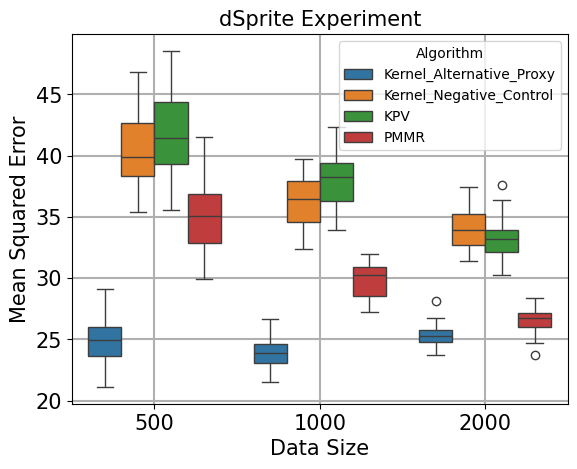

In [17]:
df_dSprite_results = pd.concat([
                                df_kernel_alternative_proxy,
                                df_kernel_negative_control, 
                                df_KPV,
                                df_PMMR
                      ],
                      axis = 0)

sns.boxplot(data=df_dSprite_results[["Algorithm", "Data_Size", "Causal_MSE"]], x='Data_Size', y='Causal_MSE', hue='Algorithm')
plt.xlabel("Data Size", fontsize=10)
plt.ylabel("Mean Squared Error", fontsize=10)
plt.title("dSprite Experiment", fontsize=10)
plt.grid(linewidth=1.5)
ApplyFont(plt.gca(), xlabel_text_size = 15.0, ylabel_text_size = 15.0, title_text_size = 15.0, ticks_text_size = 15,)
plt.savefig('Figures/Alternative_Proxy_ATE_ComplexityRegularized_dSprite_ComparisonV2_Unnormalized.pdf', format='pdf', bbox_inches = 'tight')
plt.show()

In [18]:
df_kernel_alternative_proxy.shape, df_kernel_negative_control.shape, df_KPV.shape, df_PMMR.shape

((90, 12), (90, 10), (90, 7), (90, 9))